In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel("Book1.xlsx")

In [7]:
# Display the first few rows
print(df.head())

   No.         Brand  Flavanols (mg)  Heavy Metals (µg)  Score  \
0    1        Vosges           159.1               2.00     78   
1    2  Ritter Sport           131.9               2.31     57   
2    3            Hu           261.1               5.43     48   
3    4         Lindt           174.9               4.50     39   
4    5        Lily’s           169.6               4.38     39   

   Calories per 100g  
0                580  
1                505  
2                580  
3                592  
4                580  


In [8]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No.                10 non-null     int64  
 1   Brand              10 non-null     object 
 2   Flavanols (mg)     10 non-null     float64
 3   Heavy Metals (µg)  10 non-null     float64
 4   Score              10 non-null     int64  
 5   Calories per 100g  10 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 612.0+ bytes


In [9]:
# Summary statistics
print(df.describe())

            No.  Flavanols (mg)  Heavy Metals (µg)      Score  \
count  10.00000       10.000000          10.000000  10.000000   
mean    5.50000      171.100000           6.553000  35.800000   
std     3.02765       49.885402           4.171136  21.462111   
min     1.00000       82.200000           2.000000  13.000000   
25%     3.25000      145.150000           4.410000  15.750000   
50%     5.50000      166.650000           5.015000  38.000000   
75%     7.75000      201.600000           9.427500  45.750000   
max    10.00000      261.100000          14.700000  78.000000   

       Calories per 100g  
count          10.000000  
mean          566.200000  
std            32.471526  
min           505.000000  
25%           580.000000  
50%           580.000000  
75%           580.000000  
max           592.000000  


In [10]:
# Check for missing values
print(df.isnull().sum())

No.                  0
Brand                0
Flavanols (mg)       0
Heavy Metals (µg)    0
Score                0
Calories per 100g    0
dtype: int64


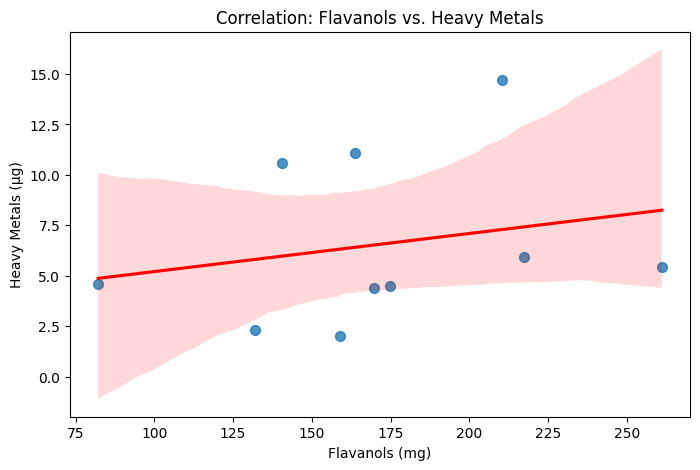

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Flavanols (mg)"], y=df["Heavy Metals (µg)"], scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title("Correlation: Flavanols vs. Heavy Metals")
plt.xlabel("Flavanols (mg)")
plt.ylabel("Heavy Metals (µg)")
plt.show()

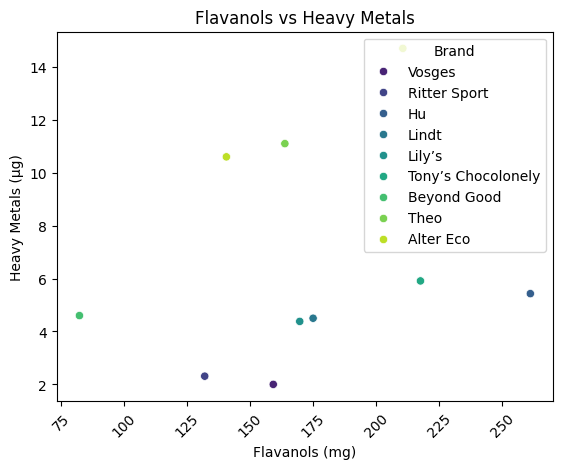

In [18]:
# Scatter plot of Flavanols vs Heavy Metals (Lead)
sns.scatterplot(x=df["Flavanols (mg)"], y=df["Heavy Metals (µg)"], hue=df["Brand"], palette='viridis')
plt.title("Flavanols vs Heavy Metals")
plt.xlabel("Flavanols (mg)")
plt.ylabel("Heavy Metals (µg)")
plt.xticks(rotation=45)
plt.show()

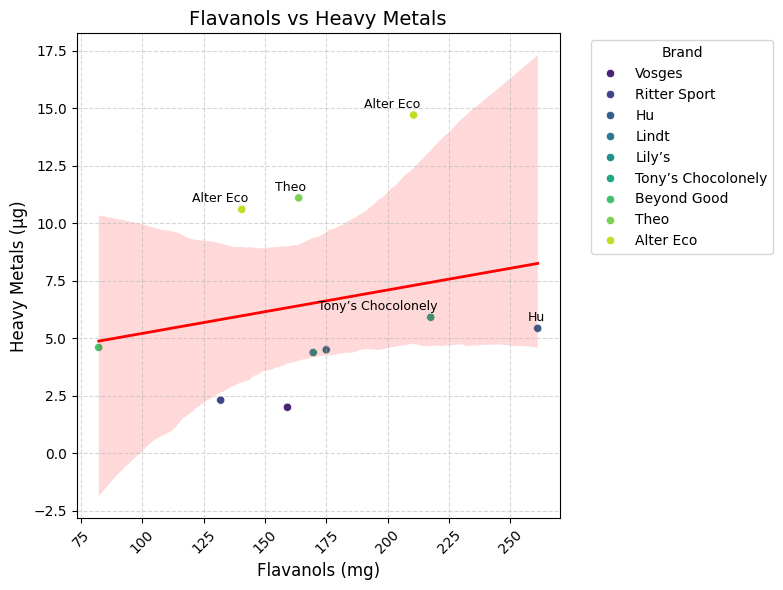

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and scatter plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=df["Flavanols (mg)"], y=df["Heavy Metals (µg)"], hue=df["Brand"], palette='viridis')

# Add regression trendline
sns.regplot(x=df["Flavanols (mg)"], y=df["Heavy Metals (µg)"], scatter=False, color='red', line_kws={"linewidth": 2})

# Annotate outliers (Heavy Metals > 5 µg)
for i, row in df.iterrows():
    if row["Heavy Metals (µg)"] > 5:
        ax.annotate(row["Brand"], (row["Flavanols (mg)"], row["Heavy Metals (µg)"]), 
                    textcoords="offset points", xytext=(5,5), ha='right', fontsize=9, color='black')

# Move the legend outside the plot
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')

# Titles and labels
plt.title("Flavanols vs Heavy Metals", fontsize=14)
plt.xlabel("Flavanols (mg)", fontsize=12)
plt.ylabel("Heavy Metals (µg)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to fit the legend
plt.tight_layout()

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9536\1276229129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Brand"], x=df["Calories per 100g"], palette='magma')


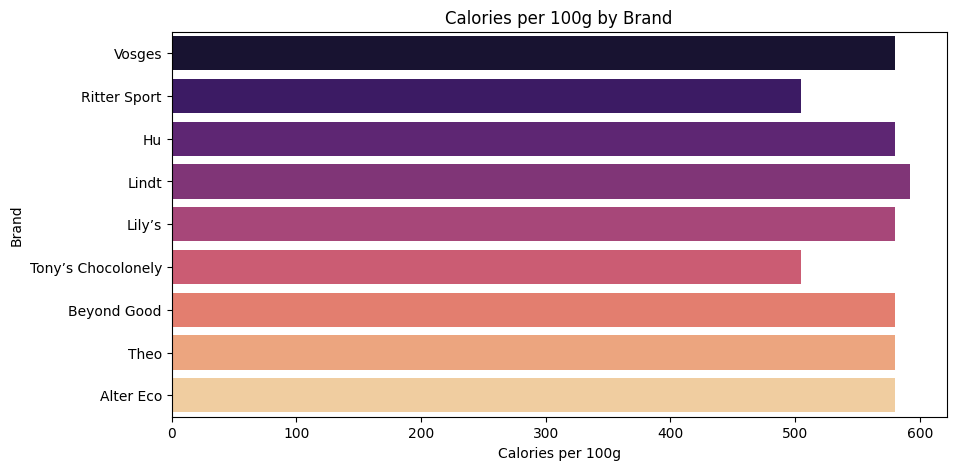

In [19]:
# Bar plot for calories per 100g by brand
plt.figure(figsize=(10, 5))
sns.barplot(y=df["Brand"], x=df["Calories per 100g"], palette='magma')
plt.title("Calories per 100g by Brand")
plt.xlabel("Calories per 100g")
plt.ylabel("Brand")
plt.show()

In [25]:
# Identify high lead content chocolates (Lead > 5 µg)
high_lead = df[df["Heavy Metals (µg)"] > 5]
print("Chocolates with High Lead Content:")
print(high_lead)

Chocolates with High Lead Content:
   No.               Brand  Flavanols (mg)  Heavy Metals (µg)  Score  \
2    3                  Hu           261.1               5.43     48   
5    6  Tony’s Chocolonely           217.5               5.91     37   
7    8                Theo           163.7              11.10     15   
8    9           Alter Eco           210.5              14.70     14   
9   10           Alter Eco           140.5              10.60     13   

   Calories per 100g  
2                580  
5                505  
7                580  
8                580  
9                580  


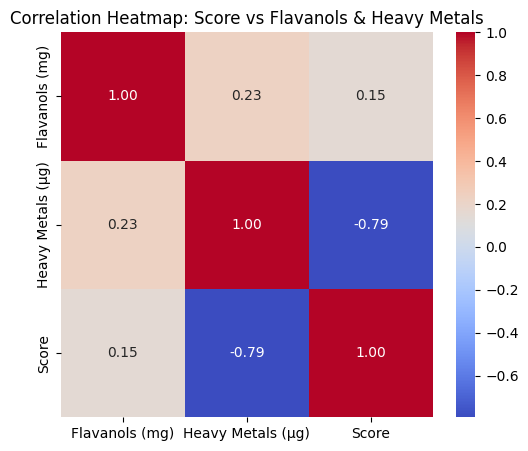

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["Flavanols (mg)", "Heavy Metals (µg)", "Score"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Score vs Flavanols & Heavy Metals")
plt.show()